## Credit Card Fraud Detection

In this project, I tried predicting fraudulent credit card transactions with the help of Machine learning models.

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
StdScaler = StandardScaler()
Pt = PowerTransformer()

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [2]:
df = pd.read_csv('archive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Pre-processing

In [3]:
#Checking the shape of the dataset
df.shape

(284807, 31)

In [4]:
#Checking the numeric distribution
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# inspect the dataframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# check for missing values
max(df.isnull().sum())

0

### Inference : 
1. No missing Values in the Dataset => it looks clean
2. Except Time and Amount all other features are from PCA.


Next : Checking if Time and Amount look useful for Class prediction

In [7]:
#observe the different feature type present in the data
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Here we will observe the distribution of our classes

In [8]:
classes=df['Class'].value_counts()
Valid_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

D:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


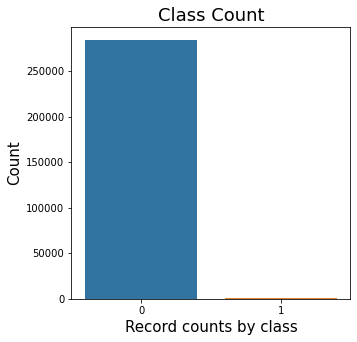

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(5,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

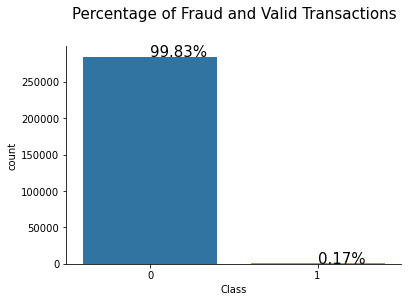

In [10]:
per = sns.countplot(x = 'Class', data = df)
per.set_title('Percentage of Fraud and Valid Transactions',fontsize=15, y=1.1)
sns.despine(left=False, bottom=False)
for p in per.patches:
    height = p.get_height()
    per.text(p.get_x()+p.get_width()/2.0, height, '{0:.2%}'.format(height/len(df)),fontsize=15) 

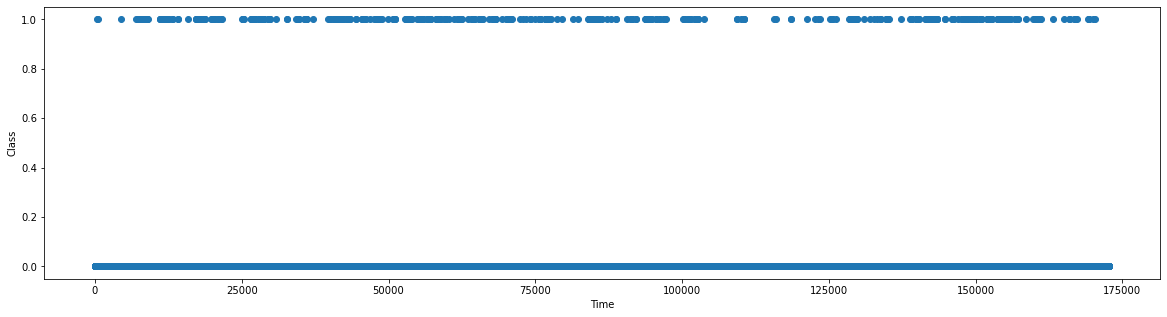

In [11]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(20,5));plt.scatter(x =df['Time'],y = df['Class']);plt.xlabel('Time');plt.ylabel('Class');plt.show()

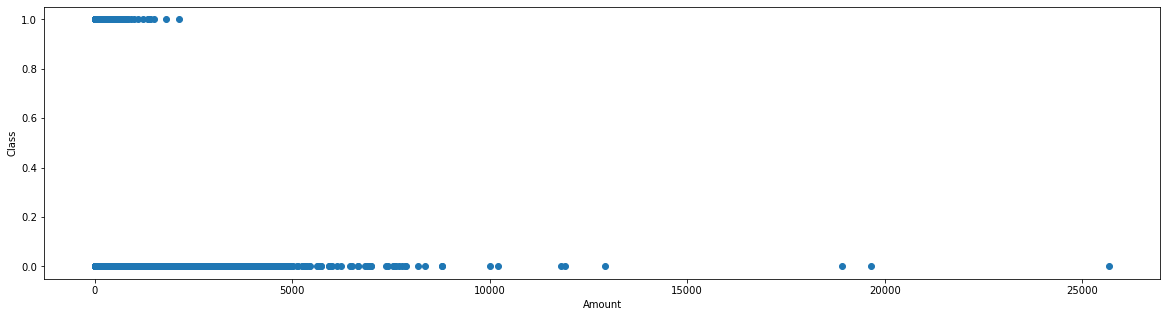

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(20,5));plt.scatter(x =df['Amount'],y = df['Class']);plt.xlabel('Amount');plt.ylabel('Class');plt.show()

### Checking the Distribution of Time and Amount

D:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Time distribution')

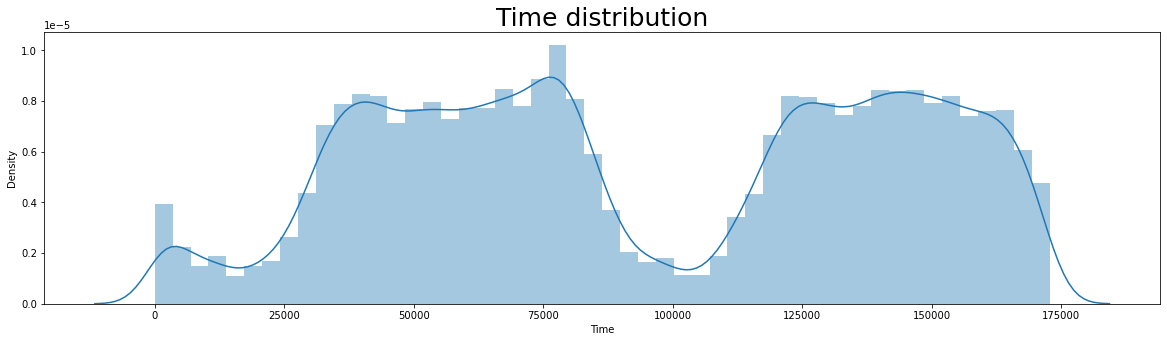

In [13]:
#Time : complete

plt.figure(figsize = (20,5))
sns.distplot(df['Time'])
plt.title('Time distribution', fontsize=25)


D:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Time distribution, when fraud happened')

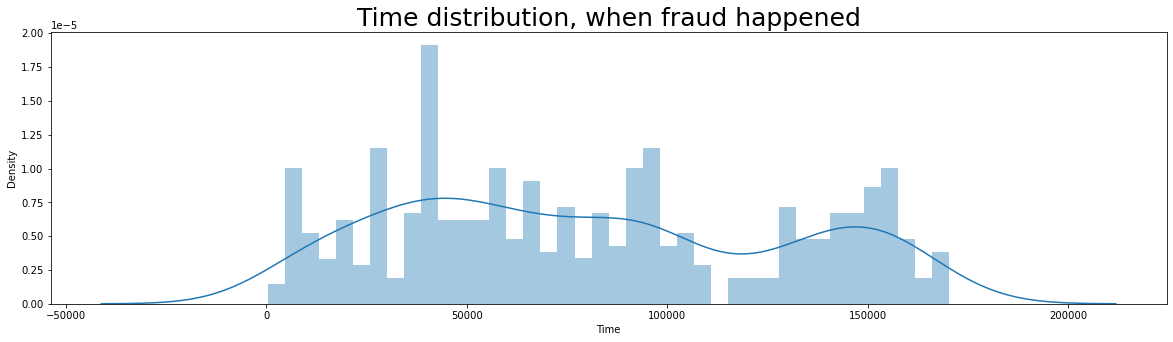

In [14]:
# Time : When fraud happened

plt.figure(figsize = (20,5))
sns.distplot(df['Time'].loc[df['Class']==1], bins = 40)
plt.title('Time distribution, when fraud happened', fontsize=25)

D:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Time distribution, when fraud DID NOT happen')

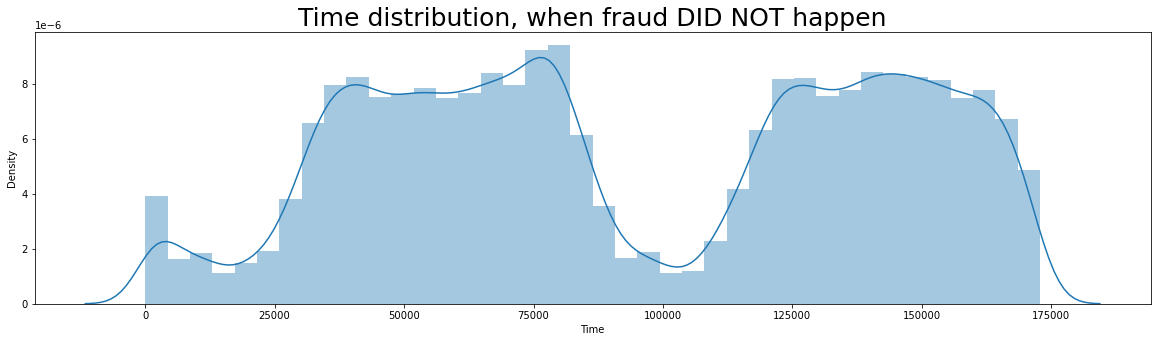

In [15]:
# Time : When fraud happened did not happen

plt.figure(figsize = (20,5))
sns.distplot(df['Time'].loc[df['Class']==0], bins = 40)
plt.title('Time distribution, when fraud DID NOT happen', fontsize=25)

**Inference : No SIGNIFICANT difference - in the time of fraud and NO fraud**

D:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Amount distribution when fraud happened')

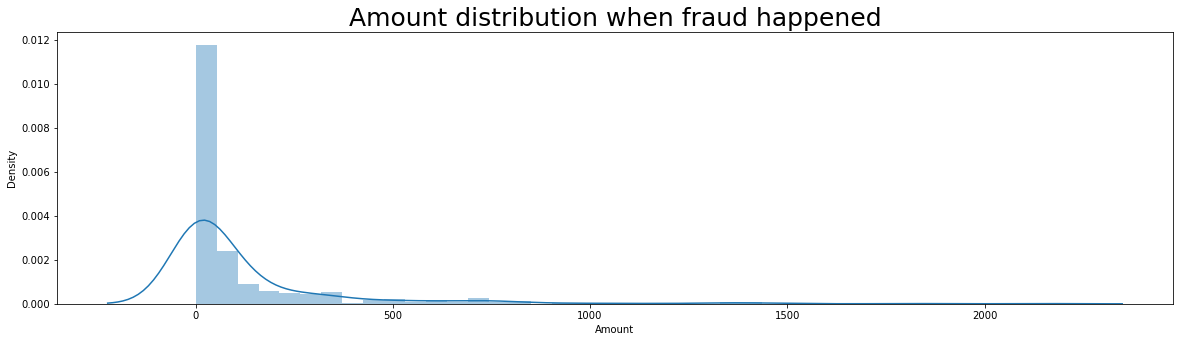

In [16]:
# Amount : When fraud happened
plt.figure(figsize = (20,5))
sns.distplot(df['Amount'].loc[df['Class']==1], bins = 40)
plt.title('Amount distribution when fraud happened', fontsize=25)

In [17]:
df['Amount'].loc[df['Class']==1].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

D:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Amount distribution when fraud happened did NOT happen')

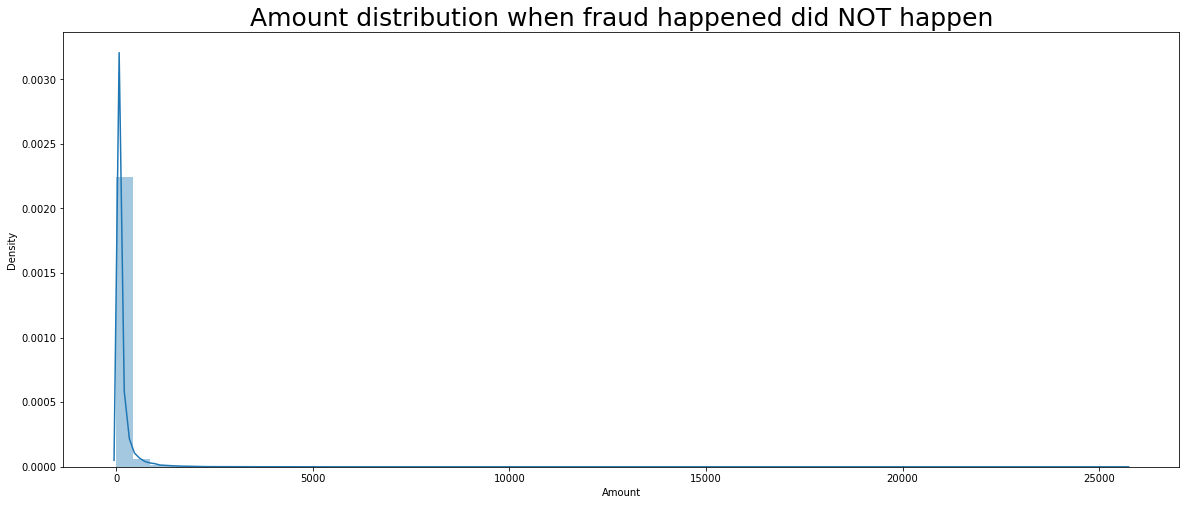

In [18]:
# Amount : When fraud happened did NOT happen
plt.figure(figsize = (20,8))
sns.distplot(df['Amount'].loc[df['Class']==0], bins = 60)
plt.title('Amount distribution when fraud happened did NOT happen', fontsize=25)

In [19]:
df['Amount'].loc[df['Class']==0].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

#### Inference : Average Fraud amount is more than AVG valid transaction ammount

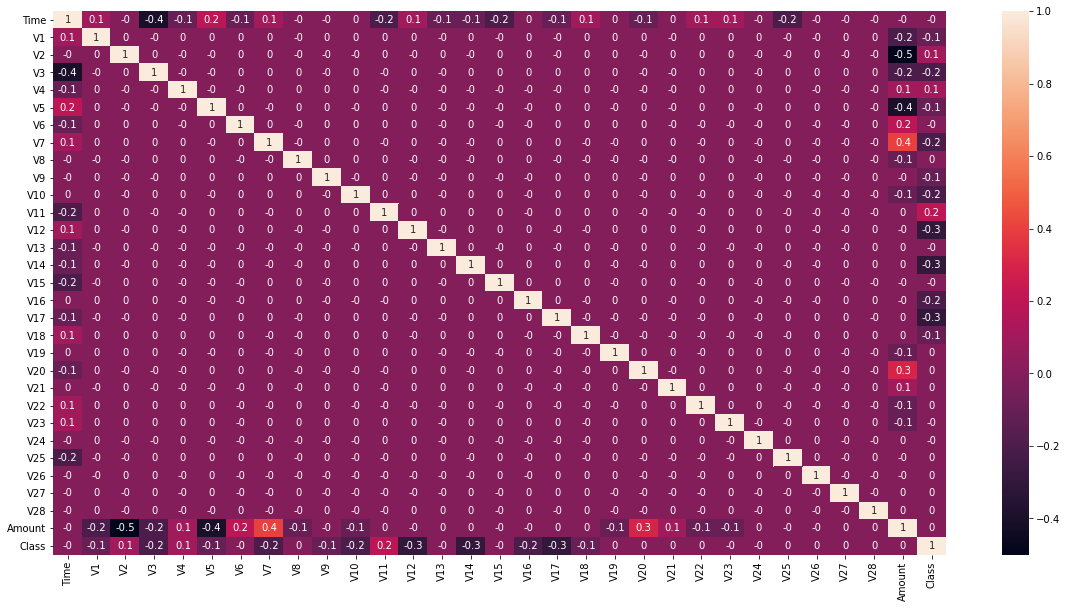

In [20]:
# Check co-relation heatmap

plt.figure(figsize=(20,10))
sns.heatmap(round(df.corr(),1), annot=True);plt.show()

#### Inference : 
1. Column V1-V28 seem non correlated. 
2. Time and amount columns has some correlation and these PCA Variables


In [21]:
# Drop unnecessary columns - Time and Amount

# New dataframe with PCA variables
df_pca_only= df.drop(labels =['Amount','Time'], axis = 1).copy()
df_pca_only.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Skew of +0.5 and 0.5 considered as 
perfect gausian dist. Anything above or below implies high skewness

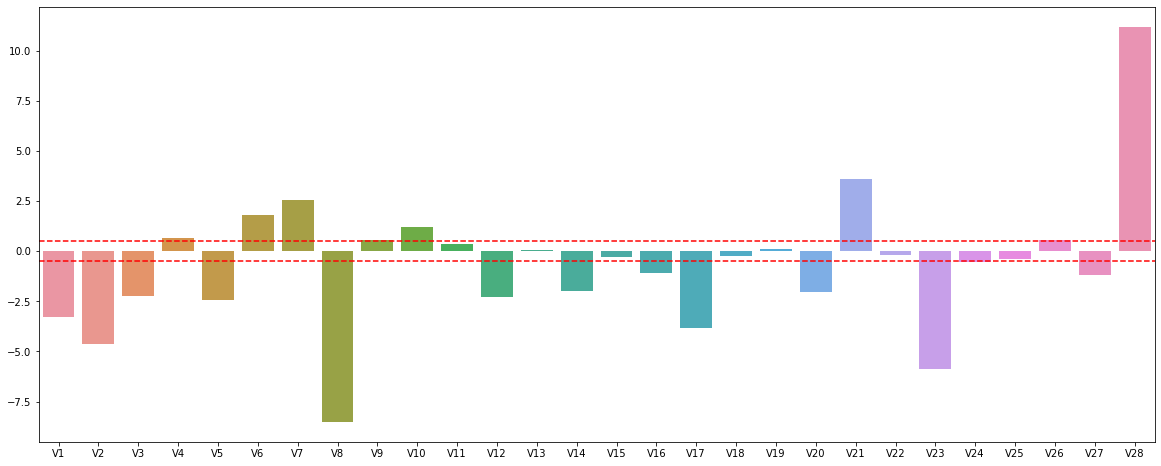

In [22]:
#Check the skew of all PC variables
plt.figure(figsize=(20,8))
sns.barplot(y = df_pca_only.skew()[:-1].values, x = df_pca_only.skew()[:-1].index)
plt.axhline(y=0.5, color='r',linestyle='--') 
plt.axhline(y=-0.5, color='r',linestyle='--') 
plt.show()

### Splitting the data into train & test data

In [23]:
#Create X and y dataset
y = df['Class']
X = df.drop(['Class'], axis=1)

In [24]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [25]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [26]:
print(np.sum(y_train))
print(np.sum(y_train))
print(np.sum(y_test))

396
396
96


### Plotting the distribution of a variable

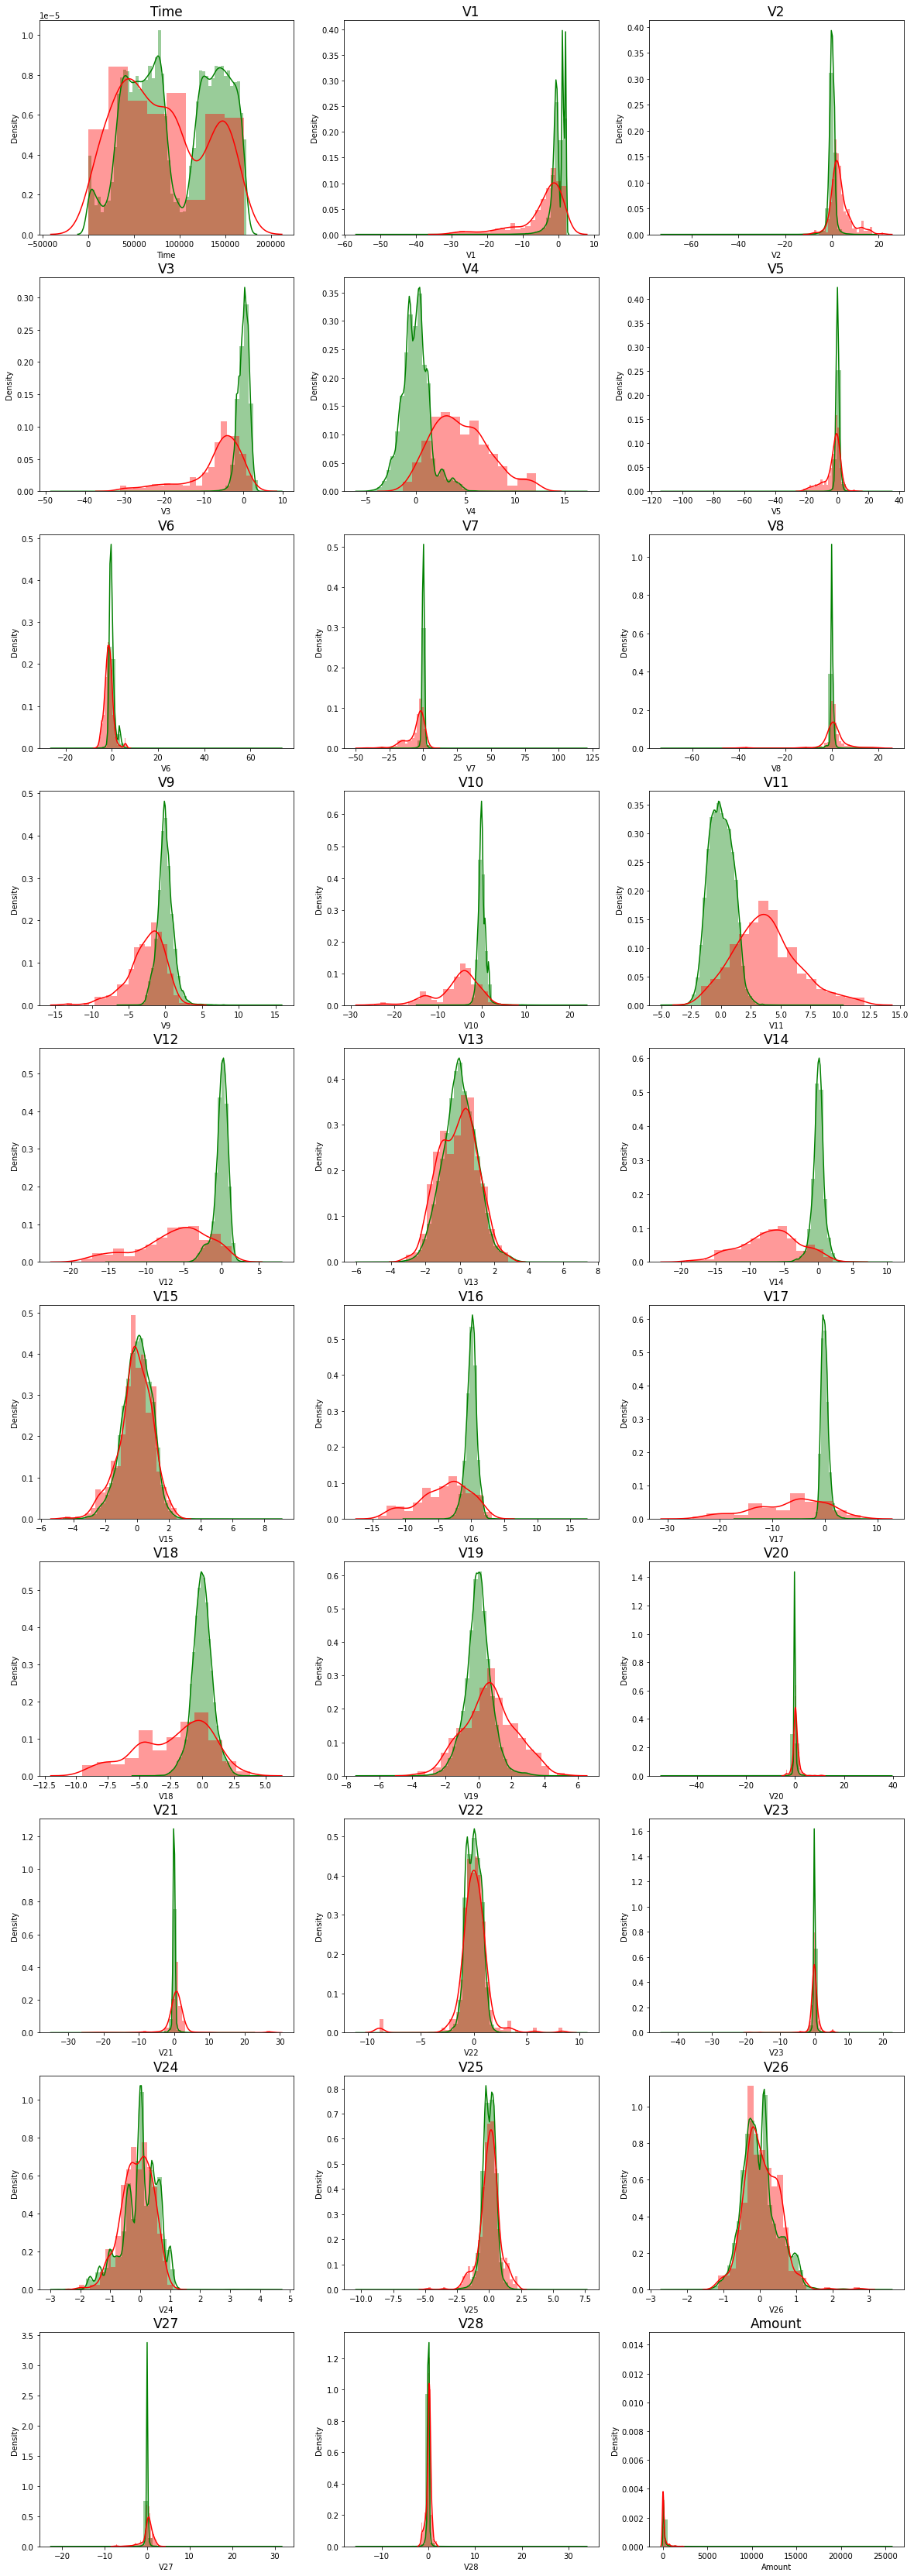

In [191]:
#plot the histogram of a variable from the dataset to see the skewness

valid_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(list(X.columns.values)):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][valid_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

## Apply Power transformer

In [28]:
#Apply Power transaformer 
X_train_pt = pd.DataFrame(Pt.fit_transform(X_train))
X_test_pt = pd.DataFrame(Pt.transform(X_test))

In [29]:
#apply column names 
X_train_pt.columns = X_train.columns
X_test_pt.columns = X_test.columns

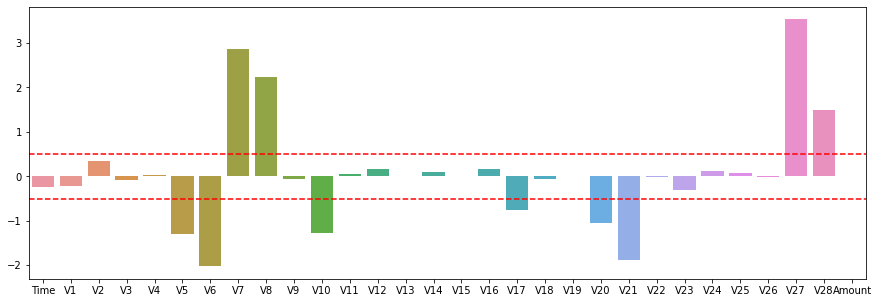

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(y = X_train_pt.skew().values, x = X_train_pt.skew().index)
plt.axhline(y=0.5, color='r',linestyle='--') 
plt.axhline(y=-0.5, color='r',linestyle='--') 
plt.show()

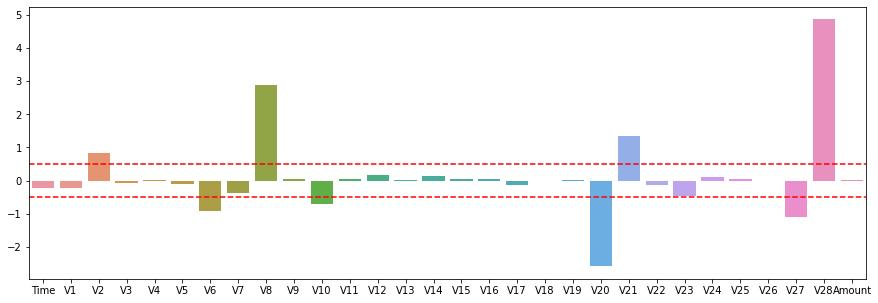

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(y = X_test_pt.skew().values, x = X_test_pt.skew().index)
plt.axhline(y=0.5, color='r',linestyle='--') # acceptable upper skew value
plt.axhline(y=-0.5, color='r',linestyle='--') # acceptable lower skew value
plt.show()

In [32]:
# Getting the column values which will be needed later
cols = list(X.columns.values)

## Model Building
- Build different models on the imbalanced dataset and see the result

In [33]:
#### Import the necessary models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report,confusion_matrix

In [34]:
#Dataframe to store results
results_df = pd.DataFrame(columns=['Model','balancing_method','Accuracy','roc_value','threshold'])

In [35]:
results_df

,Model,balancing_method,Accuracy,roc_value,threshold


In [36]:
def visualize_confusion_matrix(y_test, pred_test):
    
    print("Printing confusion Matrix")
  
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
    classNames = ['Non-Fraudalent','Fraudalent']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    matrix = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
          for j in range(2):
            plt.text(j,i, str(matrix[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

## Logistic Regression

In [37]:
def LogisticRegression(results_df, balancing_method, X_train,y_train, X_test, y_test ):

    ch = list(np.power(10.0, np.arange(-10, 10)))
    #cv = KFold(n_splits=10, shuffle=True, random_state=42)

    search_CV_l1_reg = linear_model.LogisticRegressionCV(
      Cs= ch,penalty='l1',scoring='roc_auc', random_state=42,max_iter=10000,fit_intercept=True,solver='liblinear',tol=10, n_jobs = 8) 
    
    search_CV_l2_reg = linear_model.LogisticRegressionCV(
    Cs= ch,penalty='l2',scoring='roc_auc',random_state=42,max_iter=10000,fit_intercept=True,solver='newton-cg',tol=10)
    
    #fit(X_train, y_train)
    search_CV_l2_reg.fit(X_train, y_train)
    search_CV_l1_reg.fit(X_train, y_train)
    print ('auc_roc for L2:', search_CV_l2_reg.scores_[1].mean(axis=0).max())
    print ('auc_roc for L1:', search_CV_l1_reg.scores_[1].mean(axis=0).max())

    print("Parameters for L2 regularisations")
    print(search_CV_l2_reg.coef_)
    print(search_CV_l2_reg.intercept_) 
    print(search_CV_l2_reg.scores_) 

    print("Parameters for L1 regularisations")
    print(search_CV_l1_reg.coef_)
    print(search_CV_l1_reg.intercept_) 
    print(search_CV_l1_reg.scores_) 


    #find prediction
    y_pred_l2 = search_CV_l2_reg.predict(X_test)
    y_pred_l1 = search_CV_l1_reg.predict(X_test)


    #Find prediction probabilities
    y_pred_probs_l2 = search_CV_l2_reg.predict_proba(X_test)[:,1] 
    y_pred_probs_l1 = search_CV_l1_reg.predict_proba(X_test)[:,1] 

    # Accuaracy of L2/L1 models
    Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

    # print L2 inferences
    print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
    visualize_confusion_matrix(y_test, y_pred_l2)
    print("classification Report")
    print(classification_report(y_test, y_pred_l2))

    l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
    print("l2 roc_value: {0}" .format(l2_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l2 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    results_df = results_df.append(pd.DataFrame({'Model': 'Logistic Regression with L2 Regularisation','balancing_method':balancing_method,'Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

      
    # print L1 inferences
    print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
    visualize_confusion_matrix(y_test, y_pred_l1)
    print("classification Report")
    print(classification_report(y_test, y_pred_l1))
    
    l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
    print("l1 roc_value: {0}" .format(l1_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l1 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    results_df = results_df.append(pd.DataFrame({'Model': 'Logistic Regression with L1 Regularisation','balancing_method':balancing_method,'Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
    return results_df

auc_roc for L2: 0.9830410140980177
auc_roc for L1: 0.9838029066310607
Parameters for L2 regularisations
[[-0.00561944 -0.09211346 -0.07869969 -0.29603119  0.577755    0.02473336
   0.0266234  -0.08003577 -0.20642416 -0.1960657  -0.19301848  0.15640864
  -0.50188499 -0.13712374 -0.68187682 -0.08667753 -0.18702481 -0.07632734
   0.04057388 -0.0410991  -0.0237782   0.11003639  0.110188   -0.03671409
  -0.0275206   0.01031258  0.00847567 -0.04508083 -0.02554936  0.02847589]]
[-8.09288074]
{1: array([[0.90776329, 0.90776857, 0.90776857, 0.90776857, 0.90776941,
        0.90777776, 0.9523473 , 0.97613775, 0.97873368, 0.97904311,
        0.97904311, 0.97904311, 0.97904311, 0.97904311, 0.97904311,
        0.97904311, 0.97904311, 0.97904311, 0.97904311, 0.97904311],
       [0.89247658, 0.89247491, 0.89247491, 0.89247491, 0.89247519,
        0.89247825, 0.94939575, 0.99077249, 0.99353148, 0.99442721,
        0.99418818, 0.99418818, 0.99418818, 0.99418818, 0.99418818,
        0.99418818, 0.9941881

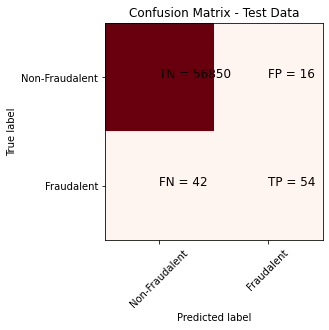

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9670762919260484
l2 threshold: 0.0010833096082331643
ROC for the test dataset 96.7%


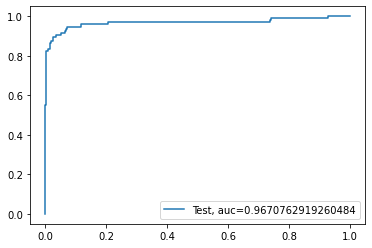

Accuarcy of Logistic model with l1 regularisation : 0.9988588883817282
Printing confusion Matrix


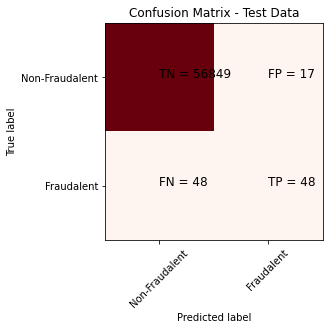

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.74      0.50      0.60        96

    accuracy                           1.00     56962
   macro avg       0.87      0.75      0.80     56962
weighted avg       1.00      1.00      1.00     56962

l1 roc_value: 0.9629195902062158
l1 threshold: 0.009147242755724249
ROC for the test dataset 96.3%


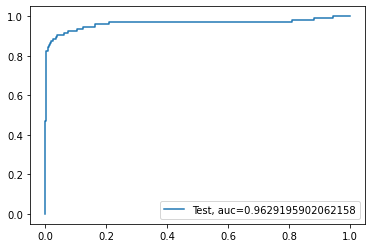

In [38]:
results_df = LogisticRegression(results_df,"Power Transformer",X_train_pt,y_train, X_test_pt, y_test)

In [39]:
results_df

,Model,balancing_method,Accuracy,roc_value,threshold
0,Logistic Regression with L2 Regularisation,Power Transformer,0.998982,0.967076,0.001083
1,Logistic Regression with L1 Regularisation,Power Transformer,0.998859,0.962920,0.009147


## KNN

In [40]:
def knn(results_df,balancing_method, X_train_pt,y_train, X_test_pt, y_test ):
  

    #create KNN model and fit the model with train dataset
    knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
    knn.fit(X_train_pt,y_train)
    score = knn.score(X_test_pt,y_test)
    print("model score:",score)

    #Accuracy
    y_pred = knn.predict(X_test)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    
    visualize_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))


    knn_probs = knn.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN roc_value: {0}" .format(knn_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC  - test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    results_df = results_df.append(pd.DataFrame({'Model': 'KNN','balancing_method': balancing_method,'Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return results_df




model score: 0.9993153330290369
Printing confusion Matrix


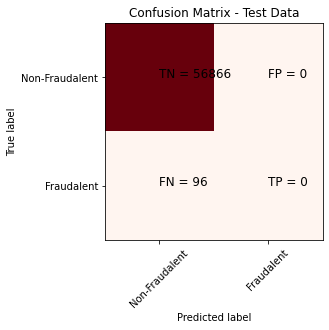

classification Report


D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.4999912073998523
KNN threshold: 1.4
ROC  - test dataset 50.0%


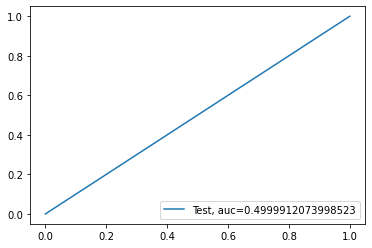

In [42]:
results_df = knn(results_df,"Power Transformer",X_train_pt,y_train, X_test_pt, y_test)

In [43]:
results_df

,Model,balancing_method,Accuracy,roc_value,threshold
0,Logistic Regression with L2 Regularisation,Power Transformer,0.998982,0.967076,0.001083
1,Logistic Regression with L1 Regularisation,Power Transformer,0.998859,0.962920,0.009147
2,KNN,Power Transformer,0.999315,0.499991,1.400000


In [46]:
def svm(results_df, balancing_method, X_train,y_train, X_test, y_test ):


    svm = SVC(kernel='sigmoid', random_state=42)
    svm.fit(X_train,y_train)
    y_pred = svm.predict(X_test)
    SVM_Score = accuracy_score(y_test,y_pred)
    print("accuracy_score : {0}".format(SVM_Score))
    visualize_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))



    # Run classifier
    classifier = SVC(kernel='sigmoid' , probability=True)
    svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, svm_probs)

    print("SVM roc_value: {0}" .format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("SVM threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    results_df = results_df.append(pd.DataFrame({'Model': 'SVM','balancing_method':balancing_method,'Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return results_df

accuracy_score : 0.9985779993679997
Printing confusion Matrix


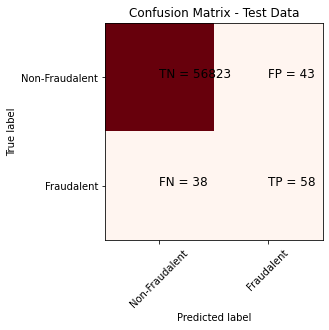

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.79      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8918967213859484
SVM threshold: 0.0007719116688185043
ROC for the test dataset 89.2%


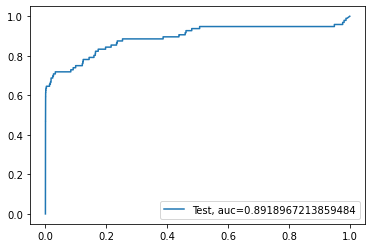

In [48]:
results_df = svm(results_df,"Power Transformer",X_train_pt,y_train, X_test_pt, y_test)

In [49]:
results_df

,Model,balancing_method,Accuracy,roc_value,threshold
0,Logistic Regression with L2 Regularisation,Power Transformer,0.998982,0.967076,0.001083
1,Logistic Regression with L1 Regularisation,Power Transformer,0.998859,0.962920,0.009147
2,KNN,Power Transformer,0.999315,0.499991,1.400000
3,SVM,Power Transformer,0.998578,0.891897,0.000772


In [50]:
def decisionTree(results_df, balancing_method, X_train,y_train, X_test, y_test ):
 
    criteria = 'entropy'
    scores = {} 

    dt = DecisionTreeClassifier(criterion = criteria , random_state=42) 
    dt.fit(X_train, y_train) 
    y_pred = dt.predict(X_test)
    
    test_score = dt.score(X_test, y_test) 
    dt_preds = dt.predict_proba(X_test)[:, 1]
    dt_roc_value = roc_auc_score(y_test, dt_preds)
    
    scores = test_score 
    print(criteria," score: {0}" .format(test_score))
    
    visualize_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
    
    print(criteria," dt_roc_value: {0}" .format(dt_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, dt_preds)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Tree threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    results_df = results_df.append(pd.DataFrame({'Model': 'Decision Tree with entropy','balancing_method':balancing_method,'Accuracy': test_score,'roc_value': dt_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return results_df



entropy  score: 0.9989817773252344
Printing confusion Matrix


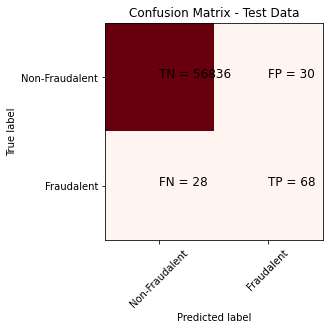

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.69      0.71      0.70        96

    accuracy                           1.00     56962
   macro avg       0.85      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962

entropy  dt_roc_value: 0.8539028886622353
Tree threshold: 1.0
ROC for the test dataset 85.4%


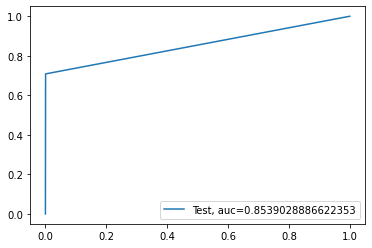

In [51]:
results_df = decisionTree(results_df,"Power Transformer",X_train_pt,y_train, X_test_pt, y_test)

In [52]:
results_df

,Model,balancing_method,Accuracy,roc_value,threshold
0,Logistic Regression with L2 Regularisation,Power Transformer,0.998982,0.967076,0.001083
1,Logistic Regression with L1 Regularisation,Power Transformer,0.998859,0.962920,0.009147
2,KNN,Power Transformer,0.999315,0.499991,1.400000
3,SVM,Power Transformer,0.998578,0.891897,0.000772
4,Decision Tree with entropy,Power Transformer,0.998982,0.853903,1.000000


In [53]:
def randomForest(results_df, balancing_method, X_train,y_train, X_test, y_test ):


    # Create the model with 100 trees
    rf= RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt', random_state=42)
    
    # Fit on training data
    rf.fit(X_train, y_train)
    RF_test_score = rf.score(X_test, y_test)
    rf.predict(X_test)

    print('Model Accuracy: {0}'.format(RF_test_score))


    # Actual class predictions
    rf_predictions = rf.predict(X_test)

    visualize_confusion_matrix(y_test, rf_predictions)
    print("classification Report")
    print(classification_report(y_test, rf_predictions))

    # Probabilities for each class
    rf_probs = rf.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, rf_probs)

    print("Random Forest roc_value: {0}" .format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Random Forest threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    results_df = results_df.append(pd.DataFrame({'Model': 'Random Forest','balancing_method':balancing_method,'Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return results_df

Model Accuracy: 0.999385555282469
Printing confusion Matrix


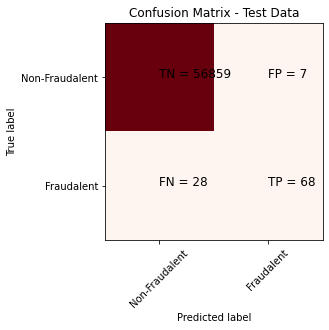

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.71      0.80        96

    accuracy                           1.00     56962
   macro avg       0.95      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.9303030735999249
Random Forest threshold: 0.02
ROC for the test dataset 93.0%


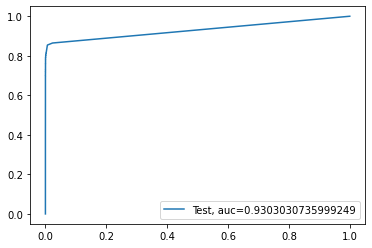

In [54]:
results_df = randomForest(results_df,"Power Transformer",X_train_pt,y_train, X_test_pt, y_test)

In [55]:
results_df

,Model,balancing_method,Accuracy,roc_value,threshold
0,Logistic Regression with L2 Regularisation,Power Transformer,0.998982,0.967076,0.001083
1,Logistic Regression with L1 Regularisation,Power Transformer,0.998859,0.962920,0.009147
2,KNN,Power Transformer,0.999315,0.499991,1.400000
3,SVM,Power Transformer,0.998578,0.891897,0.000772
4,Decision Tree with entropy,Power Transformer,0.998982,0.853903,1.000000
5,Random Forest,Power Transformer,0.999386,0.930303,0.020000


In [56]:
def xgbmodel(results_df, balancing_method,X_train,y_train, X_test, y_test ):

    # fit model 
    xgb = XGBClassifier(random_state=42)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)

    xgb_test_score = xgb.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(xgb_test_score))


    visualize_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
   
    # Probabilities for each class
    xgb_probs = xgb.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    xgb_roc_value = roc_auc_score(y_test, xgb_probs)

    print("XGBoost roc_value: {0}" .format(xgb_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, xgb_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    results_df = results_df.append(pd.DataFrame({'Model': 'xgboost','balancing_method':balancing_method,'Accuracy': xgb_test_score,'roc_value': xgb_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return results_df




D:\Softwares\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:26:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9994557775359011
Printing confusion Matrix


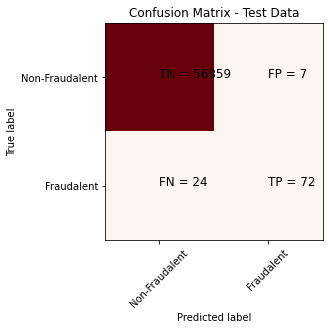

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.75      0.82        96

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost roc_value: 0.9759449114292078
XGBoost threshold: 9.032318484969437e-05
ROC for the test dataset 97.6%


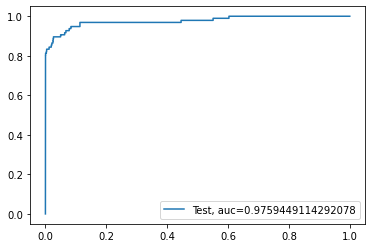

,Model,balancing_method,Accuracy,roc_value,threshold
0,Logistic Regression with L2 Regularisation,Power Transformer,0.998982,0.967076,0.001083
1,Logistic Regression with L1 Regularisation,Power Transformer,0.998859,0.962920,0.009147
2,KNN,Power Transformer,0.999315,0.499991,1.400000
3,SVM,Power Transformer,0.998578,0.891897,0.000772
4,Decision Tree with entropy,Power Transformer,0.998982,0.853903,1.000000
5,Random Forest,Power Transformer,0.999386,0.930303,0.020000
0,Logistic Regression with L2 Regularisation,Power Transformer,0.998982,0.967076,0.001083
1,Logistic Regression with L1 Regularisation,Power Transformer,0.998859,0.962920,0.009147
2,KNN,Power Transformer,0.999315,0.499991,1.400000
3,SVM,Power Transformer,0.998578,0.891897,0.000772


In [57]:
results_df.append(xgbmodel(results_df,"Power Transformer",X_train_pt,y_train, X_test_pt, y_test))

In [58]:
results_df

,Model,balancing_method,Accuracy,roc_value,threshold
0,Logistic Regression with L2 Regularisation,Power Transformer,0.998982,0.967076,0.001083
1,Logistic Regression with L1 Regularisation,Power Transformer,0.998859,0.962920,0.009147
2,KNN,Power Transformer,0.999315,0.499991,1.400000
3,SVM,Power Transformer,0.998578,0.891897,0.000772
4,Decision Tree with entropy,Power Transformer,0.998982,0.853903,1.000000
5,Random Forest,Power Transformer,0.999386,0.930303,0.020000


In [59]:
# Let me now do cross validation with Repeated K-Folds method

In [60]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# print(X,y)

In [61]:
# X = feature set and y = target
for train_index, test_index in rkf.split(X,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

In [62]:
## apply on all the models specified above

In [192]:
# Logistic Regress
print("Logistic Regression")
results_df = LogisticRegression(results_df,"Repeated KFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)

########### Computationally longer time to run
# # KNN
# print("KNN")
# results_df = knn(results_df,"Repeated KFold CV", X_train_cv,y_train_cv, X_test_cv, y_test_cv)


SVM
accuracy_score : 0.9983146363301206
Printing confusion Matrix


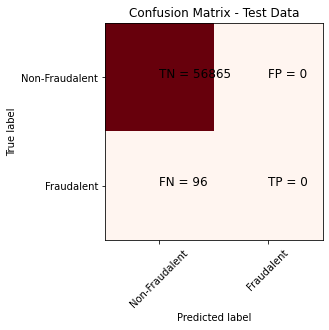

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961



D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM roc_value: 0.5120019270787538
SVM threshold: 0.001829317547105174
ROC for the test dataset 51.2%


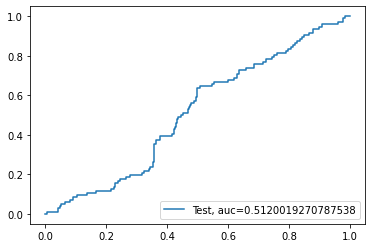

Decision Tree
entropy  score: 0.9990870946788153
Printing confusion Matrix


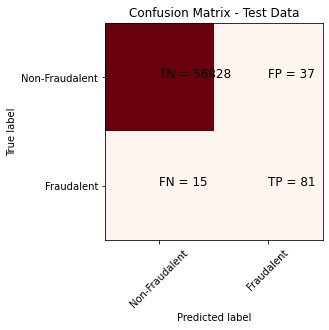

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.69      0.84      0.76        96

    accuracy                           1.00     56961
   macro avg       0.84      0.92      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy  dt_roc_value: 0.9215496680735075
Tree threshold: 1.0
ROC for the test dataset 92.2%


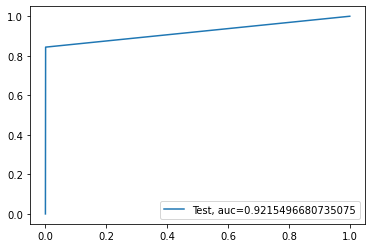

Random Forest
Model Accuracy: 0.9996488825687752
Printing confusion Matrix


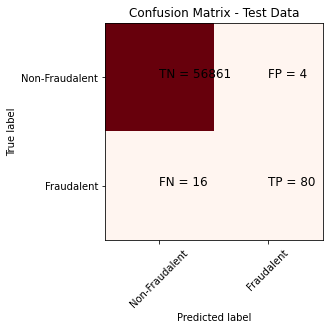

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.95      0.83      0.89        96

    accuracy                           1.00     56961
   macro avg       0.98      0.92      0.94     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9567892889592309
Random Forest threshold: 0.01
ROC for the test dataset 95.7%


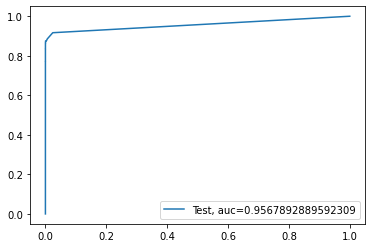

XGBoost


D:\Softwares\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:54:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9996664384403364
Printing confusion Matrix


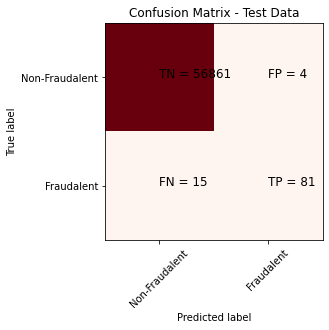

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.95      0.84      0.90        96

    accuracy                           1.00     56961
   macro avg       0.98      0.92      0.95     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9802184999560362
XGBoost threshold: 0.0001286711049033329
ROC for the test dataset 98.0%


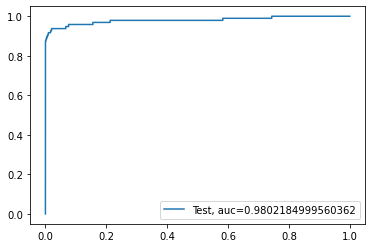

In [65]:
# SVM
print("SVM")
results_df = svm(results_df,"Repeated KFold CV", X_train_cv,y_train_cv, X_test_cv, y_test_cv)

# Decision Tree
print("Decision Tree")
results_df = decisionTree(results_df,"Repeated KFold CV", X_train_cv,y_train_cv, X_test_cv, y_test_cv)

# Random Forest
print("Random Forest")
results_df = randomForest(results_df,"Repeated KFold CV", X_train_cv,y_train_cv, X_test_cv, y_test_cv)

# XGBoost
print("XGBoost")
results_df = xgbmodel(results_df,"Repeated KFold CV", X_train_cv,y_train_cv, X_test_cv, y_test_cv)

In [66]:
results_df

,Model,balancing_method,Accuracy,roc_value,threshold
0,Logistic Regression with L2 Regularisation,Power Transformer,0.998982,0.967076,0.001083
1,Logistic Regression with L1 Regularisation,Power Transformer,0.998859,0.962920,0.009147
2,KNN,Power Transformer,0.999315,0.499991,1.400000
3,SVM,Power Transformer,0.998578,0.891897,0.000772
4,Decision Tree with entropy,Power Transformer,0.998982,0.853903,1.000000
5,Random Forest,Power Transformer,0.999386,0.930303,0.020000
6,Logistic Regression with L2 Regularisation,Repeated KFold Cross Validation,0.998718,0.992149,0.001703
7,Logistic Regression with L1 Regularisation,Repeated KFold Cross Validation,0.999070,0.950453,0.026375
8,SVM,Repeated KFold CV,0.998315,0.512002,0.001829
9,Decision Tree with entropy,Repeated KFold CV,0.999087,0.921550,1.000000


## Summary on best model on Imbalanced data :  
Model: Logistic Regression with L2 Regularisation,	Repeated KFold Cross Validation	 <br>
Accuracy : 0.9987<br>
ROC: 0.9921

In [87]:
#Evaluate XGboost model on test

XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']


D:\Softwares\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:08:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


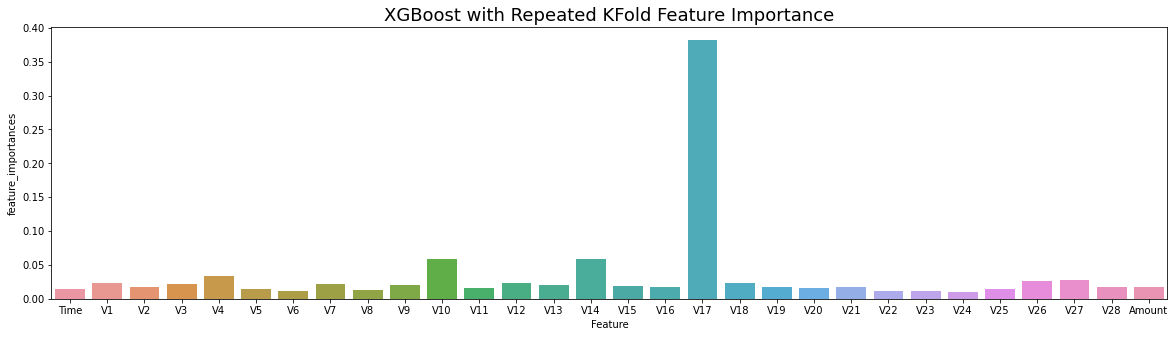

In [88]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

# Perform cross validation with StratifiedKFold

In [69]:
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=5, random_state=None)

for train_index, test_index in skf.split(X,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]


### Similarly explore other algorithms by building models


Logistic Regression


D:\Softwares\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\Softwares\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\Softwares\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\Softwares\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\Softwares\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorith

auc_roc for L2: 0.9894342523009005
auc_roc for L1: 0.9816151617526293
Parameters for L2 regularisations
[[-6.31940946e-06 -2.66052012e-02  3.99404751e-02 -6.85861871e-02
   7.11085529e-02 -8.84063157e-03 -1.81380510e-02 -4.50874204e-02
  -1.84898221e-02 -3.27994069e-02 -7.36188391e-02  5.81697646e-02
  -9.28190850e-02 -6.26455359e-03 -1.26748331e-01 -4.83624849e-04
  -5.46365550e-02 -7.89014886e-02 -2.10729767e-02  8.05262357e-03
  -1.48458117e-03  1.94047287e-02  1.07404989e-03 -1.60471491e-04
  -3.18717746e-03 -1.09346900e-03  1.39214474e-03  3.51898007e-03
   1.98153258e-03  2.75843277e-04]]
[-6.37320697]
{1: array([[0.77057974, 0.77083741, 0.77271287, 0.78176487, 0.86809242,
        0.98308804, 0.9940464 , 0.99702988, 0.99745366, 0.99721102,
        0.99721102, 0.99721102, 0.99721102, 0.99721102, 0.99721102,
        0.99721102, 0.99721102, 0.99721102, 0.99721102, 0.99721102],
       [0.97862975, 0.97775525, 0.95889945, 0.93722596, 0.96956738,
        0.98703519, 0.9872801 , 0.98678

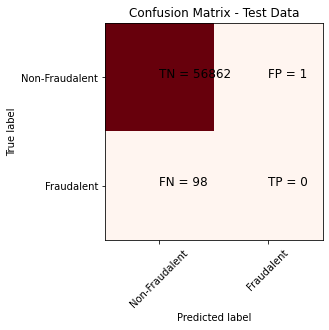

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9851337999280045
l2 threshold: 0.0008942827050292613
ROC for the test dataset 98.5%


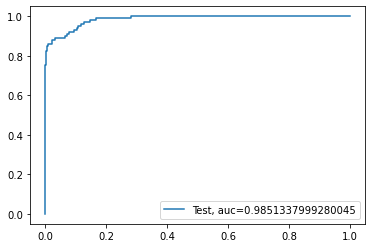

Accuarcy of Logistic model with l1 regularisation : 0.9984726391741718
Printing confusion Matrix


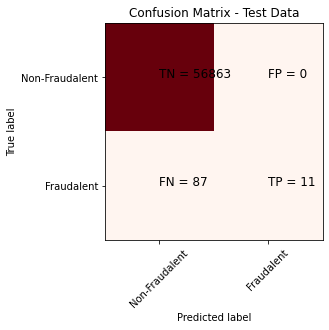

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      0.11      0.20        98

    accuracy                           1.00     56961
   macro avg       1.00      0.56      0.60     56961
weighted avg       1.00      1.00      1.00     56961

l1 roc_value: 0.9597069505043808
l1 threshold: 0.004666991724907489
ROC for the test dataset 96.0%


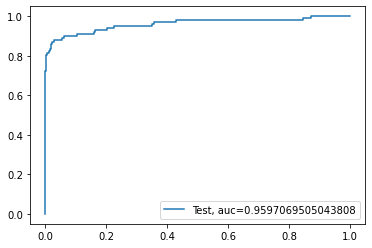

Decision Tree
entropy  score: 0.9991222064219378
Printing confusion Matrix


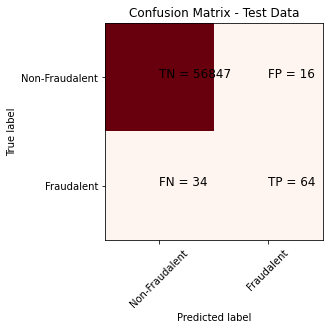

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.80      0.65      0.72        98

    accuracy                           1.00     56961
   macro avg       0.90      0.83      0.86     56961
weighted avg       1.00      1.00      1.00     56961

entropy  dt_roc_value: 0.8263899232204004
Tree threshold: 1.0
ROC for the test dataset 82.6%


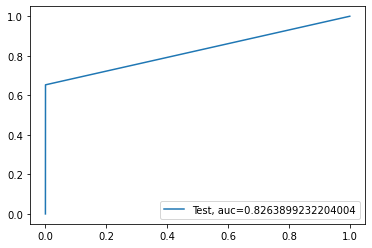

Random Forest
Model Accuracy: 0.999420656238479
Printing confusion Matrix


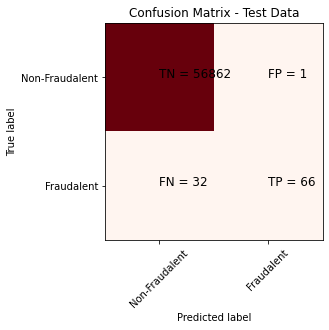

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.67      0.80        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9367330070448592
Random Forest threshold: 0.01
ROC for the test dataset 93.7%


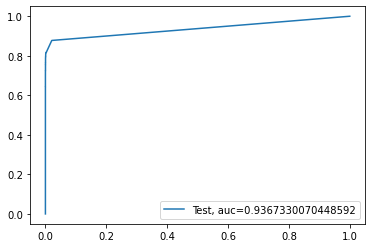

XGBoost


D:\Softwares\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9994382121100402
Printing confusion Matrix


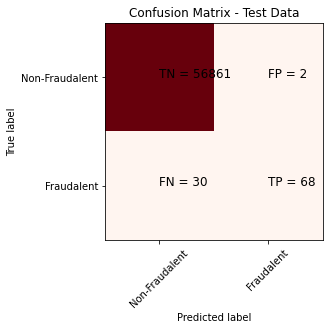

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9758453633814463
XGBoost threshold: 4.4067193812225014e-05
ROC for the test dataset 97.6%


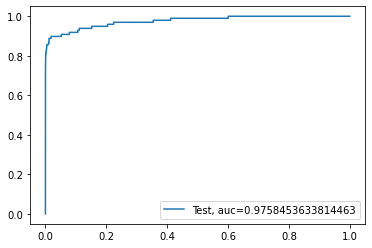

,Model,balancing_method,Accuracy,roc_value,threshold
0,Logistic Regression with L2 Regularisation,Power Transformer,0.998982,0.967076,0.001083
1,Logistic Regression with L1 Regularisation,Power Transformer,0.998859,0.962920,0.009147
2,KNN,Power Transformer,0.999315,0.499991,1.400000
3,SVM,Power Transformer,0.998578,0.891897,0.000772
4,Decision Tree with entropy,Power Transformer,0.998982,0.853903,1.000000
5,Random Forest,Power Transformer,0.999386,0.930303,0.020000
6,Logistic Regression with L2 Regularisation,Repeated KFold Cross Validation,0.998718,0.992149,0.001703
7,Logistic Regression with L1 Regularisation,Repeated KFold Cross Validation,0.999070,0.950453,0.026375
8,SVM,Repeated KFold CV,0.998315,0.512002,0.001829
9,Decision Tree with entropy,Repeated KFold CV,0.999087,0.921550,1.000000


In [70]:
# Logistic Regress
print("Logistic Regression")
results_df = LogisticRegression(results_df,"Stratified KFold CV", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
results_df

#### Not performing on KNN and SVM because they dont show efficient results in terms of ROC
#### and also because they are computationally exhausting

# # KNN
# print("KNN")
# results_df = knn(results_df,"Stratified KFold CV", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
# results_df

# # SVM
# print("SVM")
# results_df = svm(results_df,"Stratified KFold CV", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
# results_df

#######################################

# Decision Tree
print("Decision Tree")
results_df = decisionTree(results_df,"Stratified KFold CV", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
results_df

# Random Forest
print("Random Forest")
results_df = randomForest(results_df,"Stratified KFold CV", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
results_df

# XGBoost
print("XGBoost")
results_df = xgbmodel(results_df,"Stratified KFold CV", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
results_df

In [71]:
results_df

,Model,balancing_method,Accuracy,roc_value,threshold
0,Logistic Regression with L2 Regularisation,Power Transformer,0.998982,0.967076,0.001083
1,Logistic Regression with L1 Regularisation,Power Transformer,0.998859,0.962920,0.009147
2,KNN,Power Transformer,0.999315,0.499991,1.400000
3,SVM,Power Transformer,0.998578,0.891897,0.000772
4,Decision Tree with entropy,Power Transformer,0.998982,0.853903,1.000000
5,Random Forest,Power Transformer,0.999386,0.930303,0.020000
6,Logistic Regression with L2 Regularisation,Repeated KFold Cross Validation,0.998718,0.992149,0.001703
7,Logistic Regression with L1 Regularisation,Repeated KFold Cross Validation,0.999070,0.950453,0.026375
8,SVM,Repeated KFold CV,0.998315,0.512002,0.001829
9,Decision Tree with entropy,Repeated KFold CV,0.999087,0.921550,1.000000


### Summary result of best model:
Model : Logistic Regression - L2 Regularisation for StratifiedFold cross validation<br>
Accuracy : 0.9982 <br>
ROC : 0.9851


### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [72]:
# Logistic Regression

from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train_pt, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 


#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test_pt)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test_pt)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))




Max auc_roc for l2: 0.9836261013680586
Parameters for l2 regularisations
[[-0.00194767 -0.09173247 -0.07064676 -0.28672715  0.54896375  0.02827695
   0.01273933 -0.06571591 -0.2043899  -0.19165046 -0.20383879  0.16935277
  -0.48321457 -0.12616652 -0.6752812  -0.07674234 -0.17871867 -0.08542594
   0.03775591 -0.03527795 -0.02265027  0.10384995  0.10023313 -0.03182686
  -0.02940319  0.00998389  0.00807192 -0.0463887  -0.02352787  0.02064147]]
[-8.05909754]
{1: array([[0.90376378, 0.90376134, 0.90376134, 0.90376134, 0.90376256,
        0.9041533 , 0.96728794, 0.99263093, 0.99537831, 0.9964626 ,
        0.9964626 , 0.9964626 , 0.9964626 , 0.9964626 , 0.9964626 ,
        0.9964626 , 0.9964626 , 0.9964626 , 0.9964626 , 0.9964626 ],
       [0.93224086, 0.93223957, 0.93223957, 0.93223957, 0.93224086,
        0.93251493, 0.96661039, 0.98012111, 0.97730546, 0.97666812,
        0.97666812, 0.97666812, 0.97666812, 0.97666812, 0.97666812,
        0.97666812, 0.97666812, 0.97666812, 0.97666812, 0.97

In [73]:
searchCV_l2.coef_

array([[-0.00194767, -0.09173247, -0.07064676, -0.28672715,  0.54896375,
         0.02827695,  0.01273933, -0.06571591, -0.2043899 , -0.19165046,
        -0.20383879,  0.16935277, -0.48321457, -0.12616652, -0.6752812 ,
        -0.07674234, -0.17871867, -0.08542594,  0.03775591, -0.03527795,
        -0.02265027,  0.10384995,  0.10023313, -0.03182686, -0.02940319,
         0.00998389,  0.00807192, -0.0463887 , -0.02352787,  0.02064147]])

In [74]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

In [75]:
coefficients

,Feature,Importance Coefficient
0,Time,-0.001948
1,V1,-0.091732
2,V2,-0.070647
3,V3,-0.286727
4,V4,0.548964
5,V5,0.028277
6,V6,0.012739
7,V7,-0.065716
8,V8,-0.204390
9,V9,-0.191650


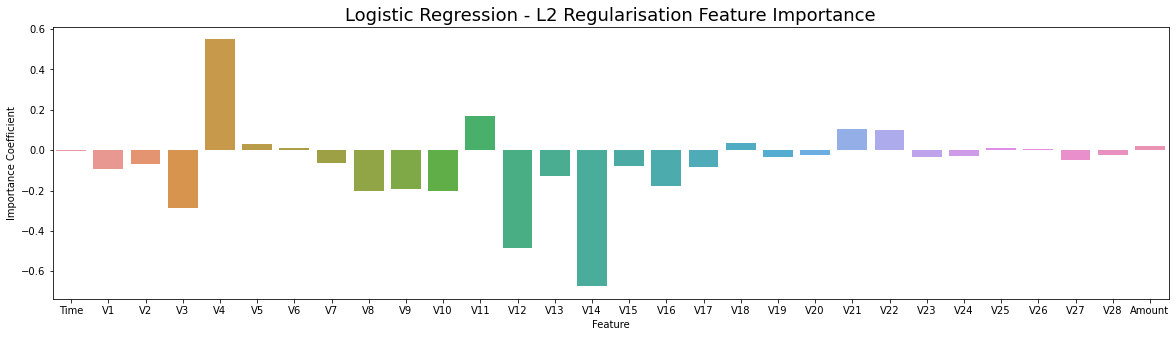

In [82]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression - L2 Regularisation Feature Importance", fontsize=18)

plt.show()



## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE


### Oversampling with RandomOverSampler and StratifiedKFold Cross Validation

**Random Oversampling method to handle the imbalance in the dataset**

1. I will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.Once I have train and test dataset I will feed the data to below models I used for training earlier, except for SVM because of computational Complexity

2. Once I get results for above model, I will compare the results and select model which provided the best results for the Random oversampling 

In [193]:
# !pip install imblearn
# !pip install delayed
# import delayed

In [89]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
import delayed

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_resample(X_train, y_train)
  
 # Create Dataframe for X_over_sampling
X_over = pd.DataFrame(data=X_over,columns=cols)

In [90]:
# X_over.shape

In [194]:
#Took more than usual to run - ran it on colab instead

# balancing_method = "Random with StratifiedKFold CV "

# # Logistic Regression
# print("Logistic Regression")
# results_df = LogisticRegression(results_df , balancing_method,X_over, y_over, X_test, y_test)
# results_df

Logistic Regression
Decision Tree
entropy  score: 0.9992626533944278
Printing confusion Matrix


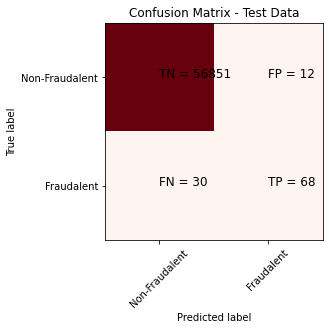

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.85      0.69      0.76        98

    accuracy                           1.00     56961
   macro avg       0.92      0.85      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy  dt_roc_value: 0.8468332587418309
Tree threshold: 1.0
ROC for the test dataset 84.7%


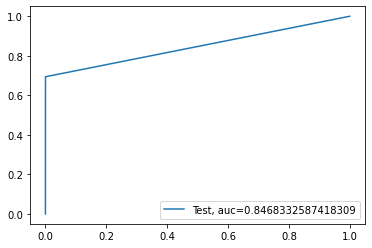

Random Forest
Model Accuracy: 0.9993679886237953
Printing confusion Matrix


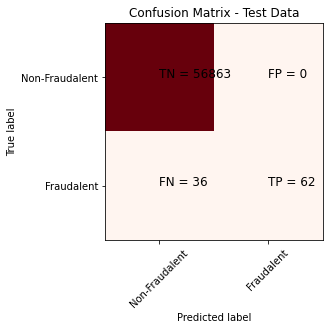

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      0.63      0.78        98

    accuracy                           1.00     56961
   macro avg       1.00      0.82      0.89     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9267716319244931
Random Forest threshold: 0.02
ROC for the test dataset 92.7%


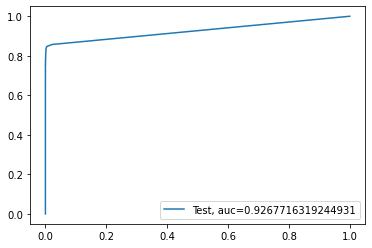

XGBoost


D:\Softwares\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.999490879724724
Printing confusion Matrix


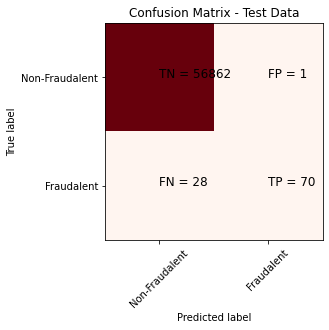

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.71      0.83        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9789093872957093
XGBoost threshold: 1.0017800377681851e-05
ROC for the test dataset 97.9%


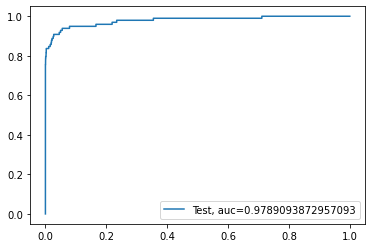

In [93]:
balancing_method = "Random with StratifiedKFold CV "


###############discarding KNN and SVM because of computational 
# complexity and non efficiency in the past

# # KNN
# print("KNN")
# results_df = knn(results_df , balancing_method,X_over, y_over, X_test, y_test)
# results_df

# SVM - takes computationally longer time and hence excluded here
# print("SVM")
# results_df = svm(results_df , balancing_method,X_over, y_over, X_test, y_test)
# results_df

# Decision Tree
print("Decision Tree")
results_df = decisionTree(results_df , balancing_method,X_over, y_over, X_test, y_test)
results_df

# Random Forest
print("Random Forest")
results_df = randomForest(results_df , balancing_method,X_over, y_over, X_test, y_test)
results_df

# XGBoost
print("XGBoost")
results_df = xgbmodel(results_df , balancing_method,X_over, y_over, X_test, y_test)


In [195]:
results_df

,Model,balancing_method,Accuracy,roc_value,threshold
0,Logistic Regression with L2 Regularisation,Power Transformer,0.998982,0.967076,0.001083
1,Logistic Regression with L1 Regularisation,Power Transformer,0.998859,0.962920,0.009147
2,KNN,Power Transformer,0.999315,0.499991,1.400000
3,SVM,Power Transformer,0.998578,0.891897,0.000772
4,Decision Tree with entropy,Power Transformer,0.998982,0.853903,1.000000
5,Random Forest,Power Transformer,0.999386,0.930303,0.020000
6,Logistic Regression with L2 Regularisation,Repeated KFold Cross Validation,0.998718,0.992149,0.001703
7,Logistic Regression with L1 Regularisation,Repeated KFold Cross Validation,0.999070,0.950453,0.026375
8,SVM,Repeated KFold CV,0.998315,0.512002,0.001829
9,Decision Tree with entropy,Repeated KFold CV,0.999087,0.921550,1.000000


## Summary Random Oversampling: 

**Best Model**: XGBOOST model with Random Oversampling with StratifiedKFold CV<br>
Accuracy : 0.9994 <br>
ROC : 0.9789

# Oversampling with  SMOTE

**SMOTE Oversampling method to handle the class imbalance**

1. I will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.Once I have train and test dataset I will feed the data to different models I used for training earlier, except for SVM because of computational Complexity

2. I will compare the results and select model which provided the best results for the SMOTE oversampling

### Print the class distribution after applying SMOTE 

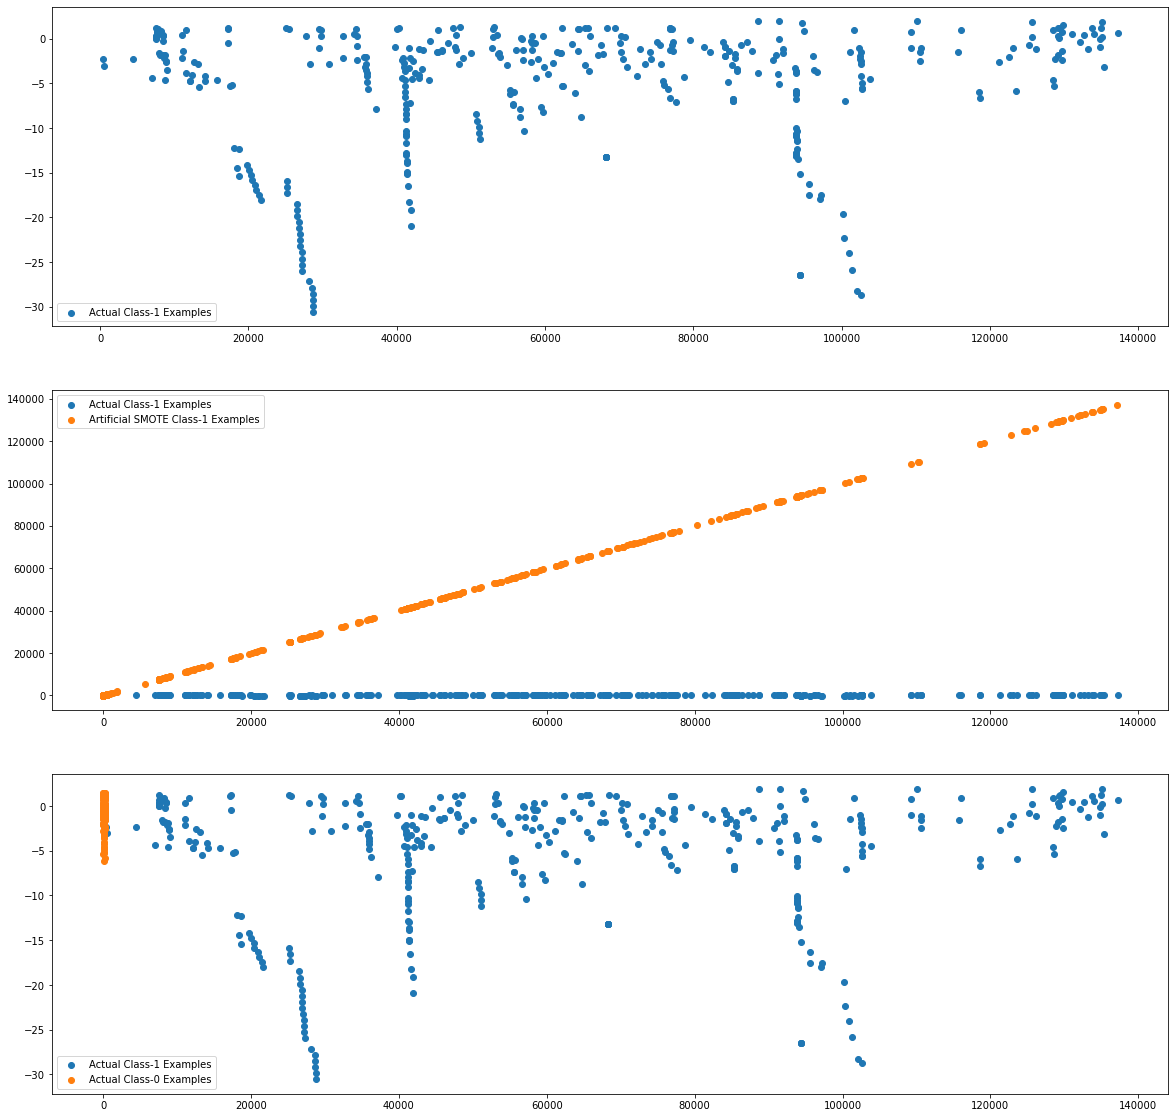

In [187]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')

plt.scatter(X_train_smote_1[:X_train_1.shape[0]], X_train_smote_1[:X_train_1.shape[0]],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [196]:
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)
  
 #Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,columns=cols)

In [197]:
# X_train.shape, X_test_pt.shape, X_test.shape,X_train_pt.shape, y_train.shape,y_test.shape

In [102]:
# resizing for further models

plt.rcParams['figure.figsize'] = [8, 10]
fig = plt.figure()

<Figure size 576x720 with 0 Axes>

In [189]:
######### took longer than usual to train on - trained it on Colab

balancing_method = "SMOTE with StratifiedKFold CV "


# Logistic Regression
print("Logistic Regression")
results_df = LogisticRegression(results_df, balancing_method, X_train_Smote, y_train_Smote , X_test, y_test)


Decision Tree
entropy  score: 0.9989642035778866
Printing confusion Matrix


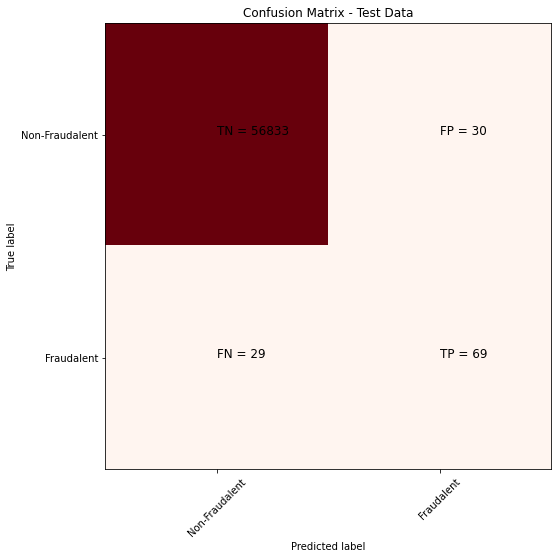

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.70      0.70      0.70        98

    accuracy                           1.00     56961
   macro avg       0.85      0.85      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy  dt_roc_value: 0.8517770244055978
Tree threshold: 1.0
ROC for the test dataset 85.2%


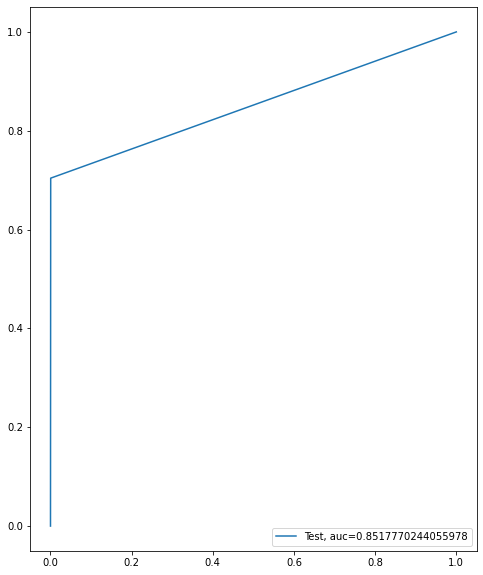

Random Forest
Model Accuracy: 0.999350432752234
Printing confusion Matrix


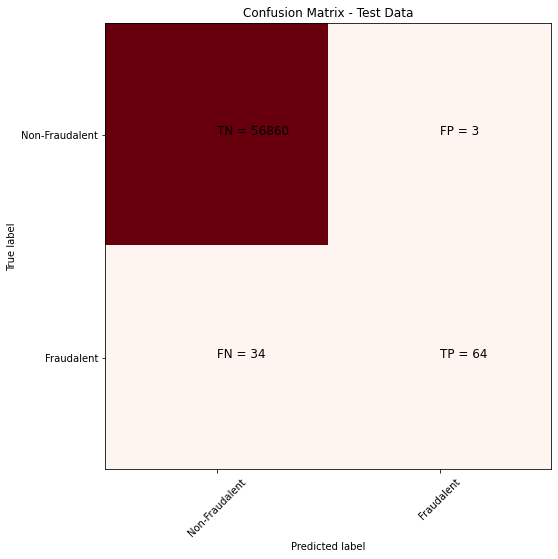

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.65      0.78        98

    accuracy                           1.00     56961
   macro avg       0.98      0.83      0.89     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9430364675282913
Random Forest threshold: 0.04
ROC for the test dataset 94.3%


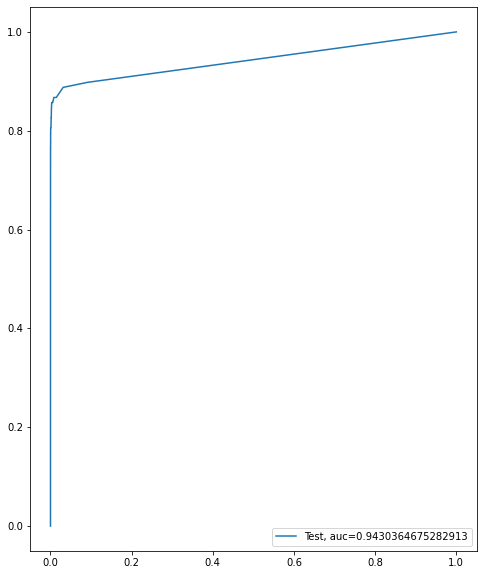

XGBoost
[23:51:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9995259914678464
Printing confusion Matrix


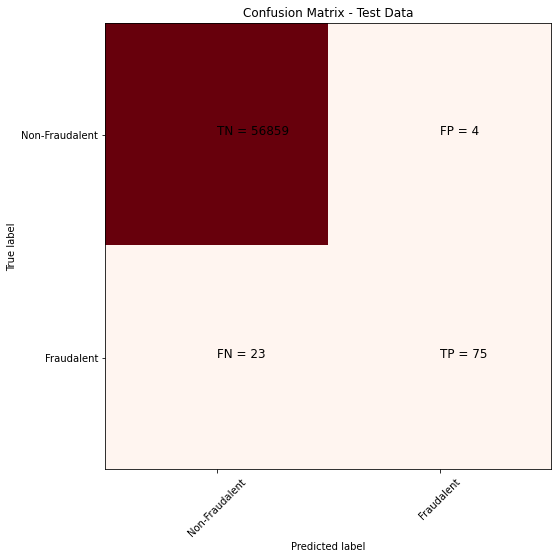

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9748547080756577
XGBoost threshold: 3.5174110962543637e-05
ROC for the test dataset 97.5%


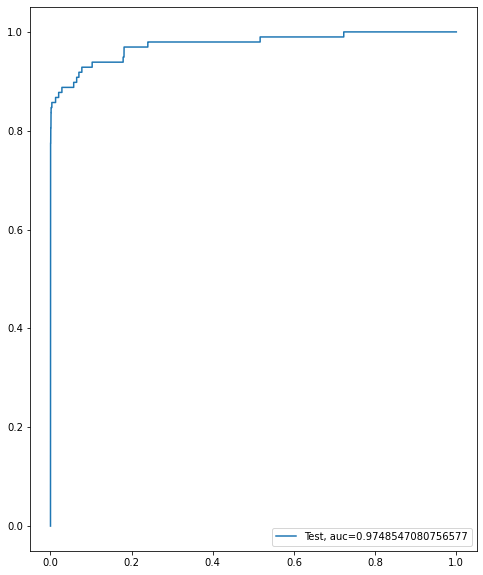

In [103]:
balancing_method = "SMOTE with StratifiedKFold CV "

#####
# KNN - Computationally exhausting and not efficient in terms of ROC value - hence not trained here
# print("KNN")
# results_df = knn(results_df, balancing_method, X_train_Smote, y_train_Smote , X_test, y_test)
# print(results_df)

# Decision Tree
print("Decision Tree")
results_df = decisionTree(results_df, balancing_method, X_train_Smote, y_train_Smote , X_test, y_test)

# Random Forest
print("Random Forest")
results_df = randomForest(results_df, balancing_method, X_train_Smote, y_train_Smote , X_test, y_test)


# XGBoost
print("XGBoost")
results_df = xgbmodel(results_df, balancing_method, X_train_Smote, y_train_Smote , X_test, y_test)


In [104]:
results_df

,Model,balancing_method,Accuracy,roc_value,threshold
0,Logistic Regression with L2 Regularisation,Power Transformer,0.998982,0.967076,0.001083
1,Logistic Regression with L1 Regularisation,Power Transformer,0.998859,0.962920,0.009147
2,KNN,Power Transformer,0.999315,0.499991,1.400000
3,SVM,Power Transformer,0.998578,0.891897,0.000772
4,Decision Tree with entropy,Power Transformer,0.998982,0.853903,1.000000
5,Random Forest,Power Transformer,0.999386,0.930303,0.020000
6,Logistic Regression with L2 Regularisation,Repeated KFold Cross Validation,0.998718,0.992149,0.001703
7,Logistic Regression with L1 Regularisation,Repeated KFold Cross Validation,0.999070,0.950453,0.026375
8,SVM,Repeated KFold CV,0.998315,0.512002,0.001829
9,Decision Tree with entropy,Repeated KFold CV,0.999087,0.921550,1.000000


## Summary SMOTE Oversampling: 


## Conclusion Oversampled data: 

**Best Model**:`XGBOOST model with Random Oversampling with StratifiedKFold CV`<br>
Accuracy : 0.9995<br> 
ROC : 0.9748 <br>


*Note : SVM,KNN and at places Logistic Regression were not trained on the local 
        machine but on Google COlab due to computational difficulties. 
        The most significant results are run on this notebook as well.


### HyperParameter Tuning  by handling  imbalance in the class

In [132]:
# fit model on training data X_over and Y_over

xgbmodel = XGBClassifier(random_state=42)
xgbmodel.fit(X_over, y_over)

xgb_test_score = xgbmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(xgb_test_score))

# Getting Probabilities
XGB_probs = xgbmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

[00:45:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.999490879724724
XGboost roc_value: 0.9789093872957093
XGBoost threshold: 1.0017800377681851e-05


### Performed the grid search for hyper parameter tuning on google colab due to less computational power

In [145]:
# Tuning parameters of max_depth, min_child_weight and num_estimators

# from xgboost.sklearn import XGBClassifier
# from sklearn.model_selection import GridSearchCV 

# param_test = {
#  'num_estimators':[120,130,140],
#   'max_depth':[1,2,3,4],
#  'min_child_weight':[3,4,5,6]
# }

# gsearch1 = GridSearchCV(estimator = XGBClassifier(
#               max_depth=4,
#               min_child_weight=4, num_estimators=130, n_jobs=8,
#               random_state=42),
#               param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)

# gsearch1.fit(X_over, y_over)
# gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [146]:
#Taking 
# max_depth:4
# min_child_weight:4
# num_estimators: 130 
############################################
# Tuning for Learning Rate

# from xgboost.sklearn import XGBClassifier
# from sklearn.model_selection import GridSearchCV 

# param_test = {
#  'learning_rate':[0.05,0.1,0.125,0.15,0.2]
# }


# gsearch1 = GridSearchCV(estimator = XGBClassifier(
#               max_depth=4,learning_rate=0.125,
#               min_child_weight=4, num_estimators=130, n_jobs=4,
#               random_state=42),
#               param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)

# gsearch1.fit(X_over, y_over)
# gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [147]:
#Taking 
# max_depth:4
# min_child_weight:4
# num_estimators: 130 
# Learning rate: 0.2

#############################################

# Tuning for gamma

# from xgboost.sklearn import XGBClassifier
# from sklearn.model_selection import GridSearchCV 
# param_test = {
# 'gamma':[i/10.0 for i in range(0,5)]
# }

# gsearch1 = GridSearchCV(estimator = XGBClassifier(
#               max_depth=4,learning_rate=0.125, gamma = 0.1,
#               min_child_weight=4, num_estimators=5, n_jobs=4,
#               random_state=42),
#               param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)

# gsearch1.fit(X_over, y_over)
# gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [148]:
#Using these parameters for testing on the test dataset

# max_depth:4
# min_child_weight:4
# num_estimators: 130 
# Learning rate: 0.2
# gamma = 0.1

clf = XGBClassifier(
              gamma=0.1,
              learning_rate=0.2, max_depth=4,
              min_child_weight=4, n_estimators=130, n_jobs=8,
              random_state=42)
clf.fit(X_over, y_over )

XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))


[01:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9994382121100402
XGboost roc_value: 0.9866310433921559
XGBoost threshold: 0.00020692142425104976


## Print the important features of the best model to understand the dataset

Top var = 15
2nd Top var = 13
3rd Top var = 11


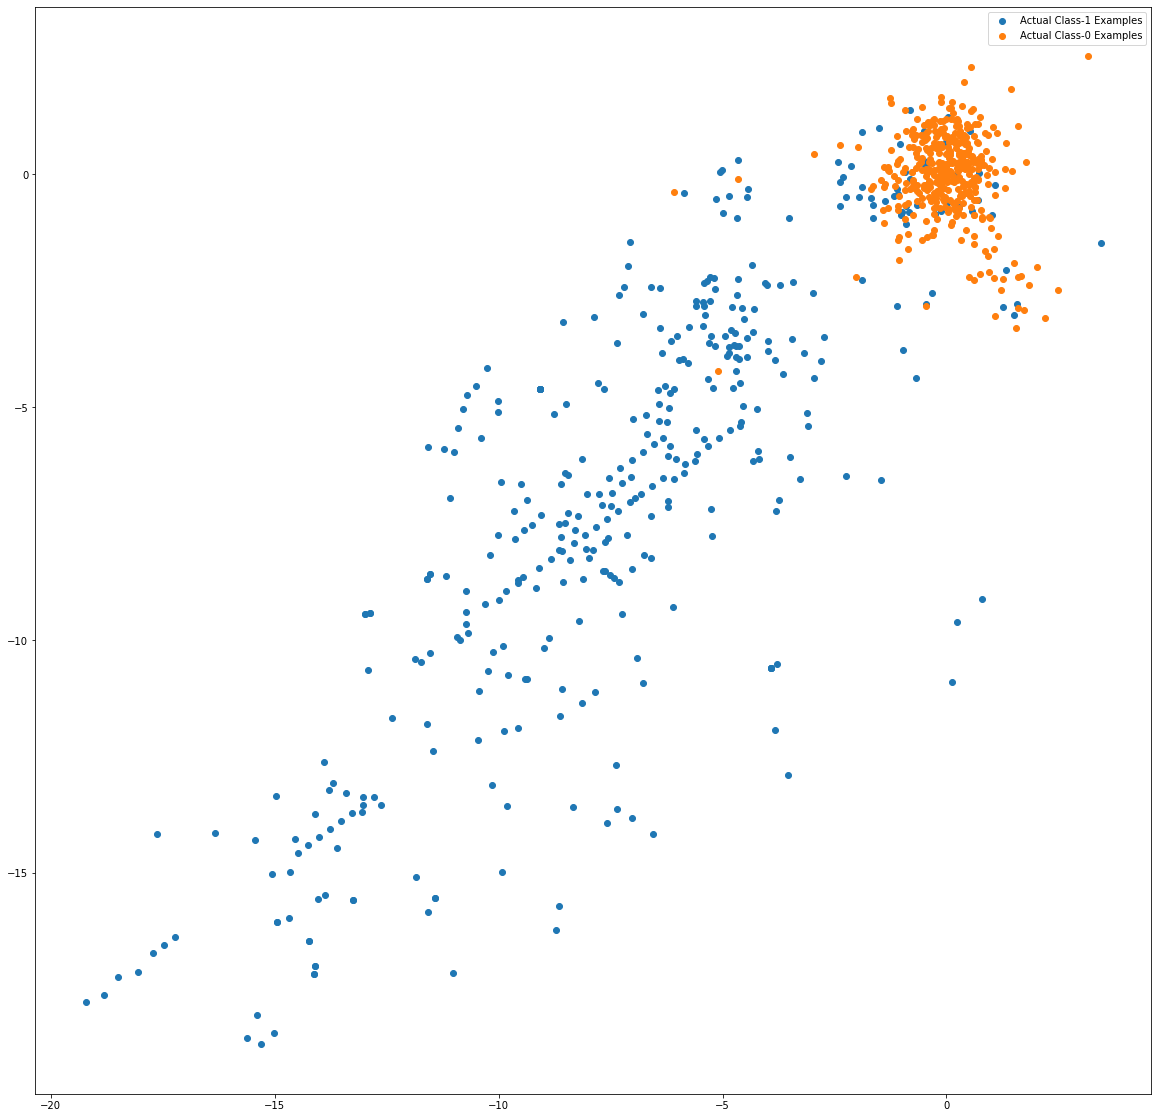

In [198]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [199]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [200]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9866310433921559
XGBoost threshold: 0.00020692142425104976


## Summary:

### Best Model that is selected for Detecting the Credit card fraud (after handling the imbalance): 

Model : XGBOOST model with Random Oversampling with StratifiedKFold CV <br>
XGboost roc_value: 0.9866310433921559 <br>
XGBoost threshold: 0.00020692142425104976
## Summary on best model on Imbalanced data :  
Model: Logistic Regression with L2 Regularisation with	Repeated KFold Cross Validation	 <br>
Accuracy : 0.9987<br>
ROC: 0.9921

